In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.integrate as integrate

# $\rho(z)$ of a grating

Text(0.5, 0, '$z$')

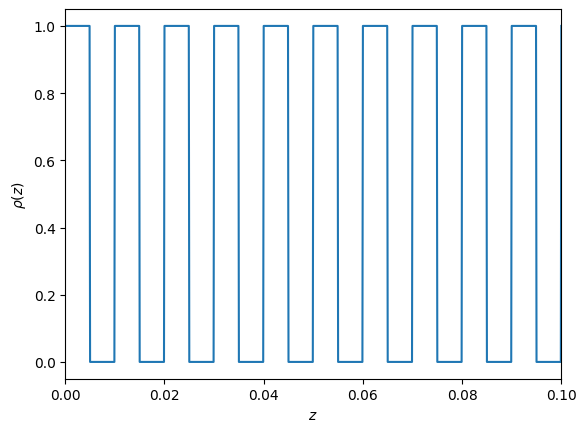

In [104]:
def rho_f(z):
    spatial_period = 0.01
    return (0.5 + 0.5 * signal.square(2 * np.pi * z / spatial_period))
    
N = 10000
l = 1
z_0 = 0
z_1 = l
z = np.linspace(z_0,z_1,N)
dz = z[1] - z[0]

rho = rho_f(z)
plt.xlim(z_0,z_1 * 0.1)
plt.plot(z,rho)
plt.ylabel(r'$\rho(z)$')
plt.xlabel(r'$z$')

# $\Delta\rho(z)$ from $\rho(z)$ and $\phi$

Text(0.5, 0, '$z$')

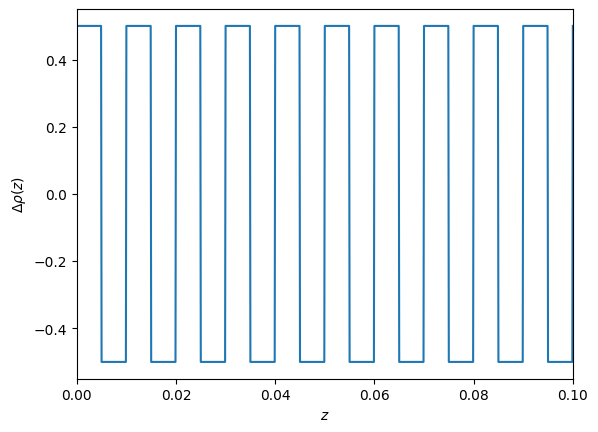

In [105]:
V = l
phi = integrate.trapezoid(rho) * dz/V
delta_rho = rho - phi
plt.xlim(z_0,z_1 * 0.1)
plt.plot(z,delta_rho)
plt.ylabel(r'$\Delta\rho(z)$')
plt.xlabel(r'$z$')

# Verification of equation (5)

In [106]:
ms_fluctuation = V * phi * (1 - phi)
integrate.trapezoid(delta_rho ** 2*dz) == ms_fluctuation

True

# $\gamma(z)$ from $\Delta \rho(z)$

In [107]:
def wrapping_correlation(delta_rho):
    double_delta_rho = np.concatenate((delta_rho, delta_rho))
    return signal.correlate(delta_rho, double_delta_rho * dz, mode='valid')

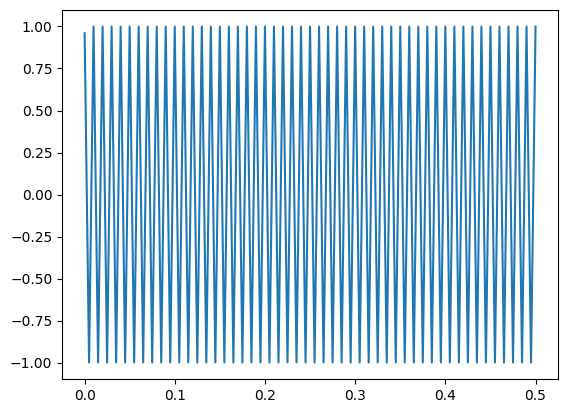

In [108]:
corr =wrapping_correlation(delta_rho)/ms_fluctuation
half_len = len(corr)//2
lags = np.linspace(0,half_len * dz,half_len)
plt.plot(lags,corr[half_len+1:])